## Prediction sales for multiple stalls, genres on the given day of a week.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### importing the datasets

In [2]:
#importing training dataset
trdata=pd.read_excel("C:\\Users\\Dell\\Downloads\\today\\train_data.xlsx")

In [3]:
#importing validation dataset
tsdata=pd.read_excel("C:\\Users\\Dell\\Downloads\\today\\test_sales_estimatesales.xlsx")

In [4]:
master=pd.read_excel("C:\\Users\\Dell\\Downloads\\today\\Master.xlsx")

In [5]:
more_attributes=pd.read_excel("C:\\Users\\Dell\\Downloads\\today\\More-Attributes.xlsx")

#### exploring the datasets

In [6]:
trdata.head()

,Book_Stall,Genre,Week_Date,Sales_in_a_week,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
trdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 293704 entries, 0 to 293703
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Book_Stall       293704 non-null  int64         
 1   Genre            293704 non-null  int64         
 2   Week_Date        293704 non-null  datetime64[ns]
 3   Sales_in_a_week  293704 non-null  float64       
 4   Holiday          293704 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 9.2 MB


In [8]:
tsdata.head()

,ID,Book_Stall,Genre,Week_Date,Holiday
0,1,1,1,2012-11-02,False
1,2,1,1,2012-11-09,False
2,3,1,1,2012-11-16,False
3,4,1,1,2012-11-23,True
4,5,1,1,2012-11-30,False


In [9]:
tsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80021 entries, 0 to 80020
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   ID          80021 non-null  int64         
 1   Book_Stall  80021 non-null  int64         
 2   Genre       80021 non-null  int64         
 3   Week_Date   80021 non-null  datetime64[ns]
 4   Holiday     80021 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(3)
memory usage: 2.5 MB


In [10]:
master.head()

,Stall,Size
0,1,151315
1,2,202307
2,3,37392
3,4,205863
4,5,34875


In [12]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Stall   30 non-null     int64
 1   Size    30 non-null     int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [11]:
more_attributes.head()

,ID,Date_in_a_week,Campaign 1,Campaign 2,Consumer Price Index,Holiday
0,1,2010-02-05,NaN,NaN,211.096358,False
1,1,2010-02-12,NaN,NaN,211.242170,True
2,1,2010-02-19,NaN,NaN,211.289143,False
3,1,2010-02-26,NaN,NaN,211.319643,False
4,1,2010-03-05,NaN,NaN,211.350143,False


In [13]:
more_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5460 entries, 0 to 5459
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    5460 non-null   int64         
 1   Date_in_a_week        5460 non-null   datetime64[ns]
 2   Campaign 1            2698 non-null   float64       
 3   Campaign 2            2120 non-null   float64       
 4   Consumer Price Index  5070 non-null   float64       
 5   Holiday               5460 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(3), int64(1)
memory usage: 218.7 KB


In [17]:
more_attributes['ID'].value_counts(ascending=True)

4     182
19    182
15    182
11    182
7     182
3     182
30    182
26    182
22    182
18    182
14    182
10    182
6     182
2     182
29    182
25    182
21    182
17    182
13    182
9     182
5     182
1     182
28    182
24    182
20    182
16    182
12    182
8     182
23    182
27    182
Name: ID, dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


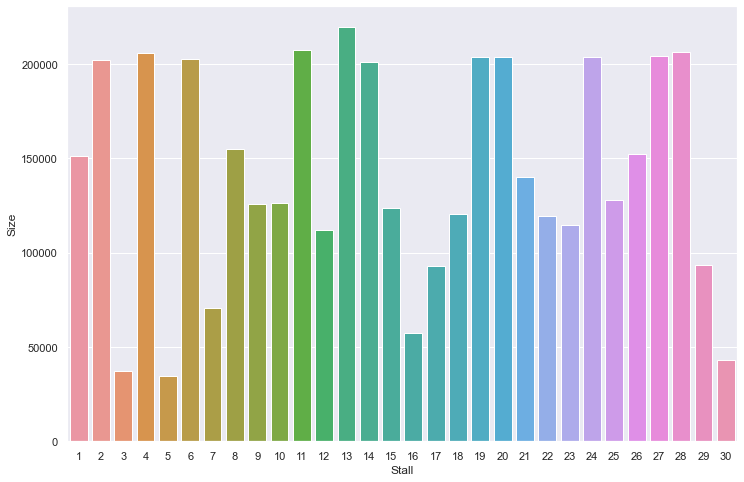

In [29]:
plt.figure(figsize=(12,8))
sns.barplot(master['Stall'],master['Size']);

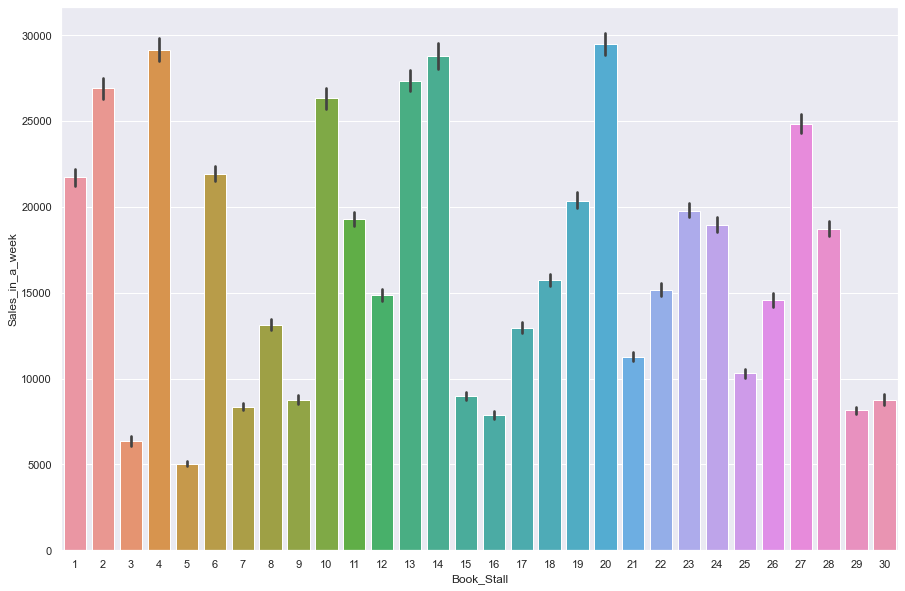

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(trdata['Book_Stall'],trdata['Sales_in_a_week']);

In [32]:
trdata['Book_Stall'].value_counts()

13    10474
10    10315
4     10272
1     10244
2     10238
24    10228
27    10225
20    10214
6     10211
19    10148
28    10113
11    10062
23    10050
14    10040
15     9901
8      9895
17     9864
18     9859
26     9854
25     9804
7      9762
12     9705
22     9688
21     9582
29     9455
16     9443
3      9036
5      8999
9      8867
30     7156
Name: Book_Stall, dtype: int64

In [33]:
#merging stall sizes to the training and testing datasets
tr_data = pd.merge(trdata, master, left_on='Book_Stall', right_on='Stall', how='left').drop('Stall', axis=1)
ts_data = pd.merge(tsdata, master, left_on='Book_Stall', right_on='Stall', how='left').drop('Stall', axis=1)

In [34]:
tr_data.head()

,Book_Stall,Genre,Week_Date,Sales_in_a_week,Holiday,Size
0,1,1,2010-02-05,24924.50,False,151315
1,1,1,2010-02-12,46039.49,True,151315
2,1,1,2010-02-19,41595.55,False,151315
3,1,1,2010-02-26,19403.54,False,151315
4,1,1,2010-03-05,21827.90,False,151315


In [35]:
ts_data.head()

,ID,Book_Stall,Genre,Week_Date,Holiday,Size
0,1,1,1,2012-11-02,False,151315
1,2,1,1,2012-11-09,False,151315
2,3,1,1,2012-11-16,False,151315
3,4,1,1,2012-11-23,True,151315
4,5,1,1,2012-11-30,False,151315


In [46]:
#convert holiday into numeric from boolean
tr_data['Holiday']=tr_data['Holiday'].astype(int)
ts_data['Holiday']=ts_data['Holiday'].astype(int)

In [49]:
#converting datestamp into day month and year for training data
month=[]
day=[]
year=[]

#appending day, month and year in  empty lists
for i in range(len(tr_data)):
    day.append(tr_data['Week_Date'].iloc[i].day)
    year.append(tr_data['Week_Date'].iloc[i].year)
    month.append(tr_data['Week_Date'].iloc[i].month)
 

In [50]:
tr_data['day']=day
tr_data['month']=month
tr_data['year']=year


In [51]:
tr_data.head()

,Book_Stall,Genre,Week_Date,Sales_in_a_week,Holiday,Size,day,month,year
0,1,1,2010-02-05,24924.50,0,151315,5,2,2010
1,1,1,2010-02-12,46039.49,1,151315,12,2,2010
2,1,1,2010-02-19,41595.55,0,151315,19,2,2010
3,1,1,2010-02-26,19403.54,0,151315,26,2,2010
4,1,1,2010-03-05,21827.90,0,151315,5,3,2010


In [52]:
#converting datestamp into day month and year for test data
month=[]
day=[]
year=[]

#appending day, month and year in  empty lists
for i in range(len(ts_data)):
    day.append(ts_data['Week_Date'].iloc[i].day)
    year.append(ts_data['Week_Date'].iloc[i].year)
    month.append(ts_data['Week_Date'].iloc[i].month)

In [53]:
ts_data['day']=day
ts_data['month']=month
ts_data['year']=year

In [54]:
ts_data.head()

,ID,Book_Stall,Genre,Week_Date,Holiday,Size,day,month,year
0,1,1,1,2012-11-02,0,151315,2,11,2012
1,2,1,1,2012-11-09,0,151315,9,11,2012
2,3,1,1,2012-11-16,0,151315,16,11,2012
3,4,1,1,2012-11-23,1,151315,23,11,2012
4,5,1,1,2012-11-30,0,151315,30,11,2012


In [55]:
#dropping datestamp column from both test and train data
train_data=tr_data.drop(['Week_Date'],axis=1)
test_data=ts_data.drop(['Week_Date'],axis=1)

In [57]:
train_data.head()

,Book_Stall,Genre,Sales_in_a_week,Holiday,Size,day,month,year
0,1,1,24924.50,0,151315,5,2,2010
1,1,1,46039.49,1,151315,12,2,2010
2,1,1,41595.55,0,151315,19,2,2010
3,1,1,19403.54,0,151315,26,2,2010
4,1,1,21827.90,0,151315,5,3,2010


In [58]:
test_data.head()

,ID,Book_Stall,Genre,Holiday,Size,day,month,year
0,1,1,1,0,151315,2,11,2012
1,2,1,1,0,151315,9,11,2012
2,3,1,1,0,151315,16,11,2012
3,4,1,1,1,151315,23,11,2012
4,5,1,1,0,151315,30,11,2012


In [59]:
#final checking the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293704 entries, 0 to 293703
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Book_Stall       293704 non-null  int64  
 1   Genre            293704 non-null  int64  
 2   Sales_in_a_week  293704 non-null  float64
 3   Holiday          293704 non-null  int32  
 4   Size             293704 non-null  int64  
 5   day              293704 non-null  int64  
 6   month            293704 non-null  int64  
 7   year             293704 non-null  int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 19.0 MB


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80021 entries, 0 to 80020
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   ID          80021 non-null  int64
 1   Book_Stall  80021 non-null  int64
 2   Genre       80021 non-null  int64
 3   Holiday     80021 non-null  int32
 4   Size        80021 non-null  int64
 5   day         80021 non-null  int64
 6   month       80021 non-null  int64
 7   year        80021 non-null  int64
dtypes: int32(1), int64(7)
memory usage: 5.2 MB


In [61]:
#splitting predictors and labels in train data
y=train_data['Sales_in_a_week']
X=train_data.drop(['Sales_in_a_week'],axis=1)

In [63]:
X.head()

,Book_Stall,Genre,Holiday,Size,day,month,year
0,1,1,0,151315,5,2,2010
1,1,1,1,151315,12,2,2010
2,1,1,0,151315,19,2,2010
3,1,1,0,151315,26,2,2010
4,1,1,0,151315,5,3,2010


In [64]:
y

0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
293699        0.02
293700        0.02
293701        0.02
293702        0.02
293703        0.02
Name: Sales_in_a_week, Length: 293704, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=9)

In [67]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [68]:
rf = RandomForestRegressor(n_estimators=100, max_features=6, min_samples_split=8, min_samples_leaf=1)
rf.fit(X_train, y_train)
y_predtr = rf.predict(X_train)
mse_rf = mean_squared_error(y_train, y_predtr)
rmse_all = np.sqrt(mse_rf)
print("MSE: %f" % (mse_rf))
print("RMSE: %f" % (rmse_all))

MSE: 6570917.480161
RMSE: 2563.380089


In [69]:
mae_rf = mean_absolute_error(y_train, y_predtr)
print("MAE: %f" % (mae_rf))

MAE: 1047.398781


### checking on testing dataset from splitting

In [71]:
#checking it on test data
y_predts=rf.predict(X_test)
mse_rfts = mean_squared_error(y_test, y_predts)
rmse_allts = np.sqrt(mse_rfts)
print("MSE: %f" % (mse_rfts))
print("RMSE: %f" % (rmse_allts))

MSE: 13662816.985085
RMSE: 3696.324794


In [73]:
mae_rfts = mean_absolute_error(y_test, y_predts)
print("MAE: %f" % (mae_rfts))

MAE: 1527.440009


### Checking on validation dataset as given test data in main problem

In [74]:
val_data=test_data.drop(['ID'],axis=1)

In [76]:
val_data.head()

,Book_Stall,Genre,Holiday,Size,day,month,year
0,1,1,0,151315,2,11,2012
1,1,1,0,151315,9,11,2012
2,1,1,0,151315,16,11,2012
3,1,1,1,151315,23,11,2012
4,1,1,0,151315,30,11,2012


In [77]:
y_pred_val=rf.predict(val_data)

In [78]:
#predictions
sale_predictions = pd.DataFrame({'ID':test_data.ID.values,'Sales_in_a_week':y_pred_val})
sale_predictions.head()

,ID,Sales_in_a_week
0,1,34041.256081
1,2,21952.005595
2,3,21484.454527
3,4,21351.775567
4,5,36633.098403


In [79]:
sale_predictions.to_csv('C:\\Users\\Dell\\Downloads\\today\\predictions.csv',index=False,header=True)